In [1]:
import pandas as pd
import numpy as np

In [2]:
books=pd.read_csv('Books.csv')

In [3]:
rating=pd.read_csv('Ratings.csv')

In [4]:
user=pd.read_csv('Users.csv')

In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
books['Image-URL-L'][1]

'http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg'

In [7]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [8]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
print(books.shape)
print(rating.shape)
print(user.shape)

(90154, 8)
(910187, 3)
(278858, 3)


In [10]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [11]:
user.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


In [12]:
rating.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,1


**Exploratory Data Analysis (EDA)**

In [13]:
books['Publisher'].value_counts()

,count
Publisher,
Harlequin,2849
Pocket,1786
Ballantine Books,1747
Bantam Books,1483
Silhouette,1475
...,...
Catholic Book Publishing Company,1
Harcourt Religious Publishers,1
Arrow Books Ltd,1


In [14]:
most_rated_books = rating.groupby("ISBN")["Book-Rating"].count().sort_values(ascending=False).head(10)
most_rated_books=pd.DataFrame(most_rated_books)
most_rated_books

,Book-Rating
ISBN,
0971880107,1967
0316666343,1000
0385504209,699
0312195516,586
0060928336,586
044023722X,515
0679781587,499
0142001740,495
067976402X,482


In [15]:
books['Book-Author'].value_counts()

,count
Book-Author,
Agatha Christie,302
Stephen King,291
William Shakespeare,208
Carolyn Keene,188
Ann M. Martin,177
...,...
Sibilla Aleramo,1
GÃ?Â¼nter Freitag,1
Juri Rytcheu,1


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: >

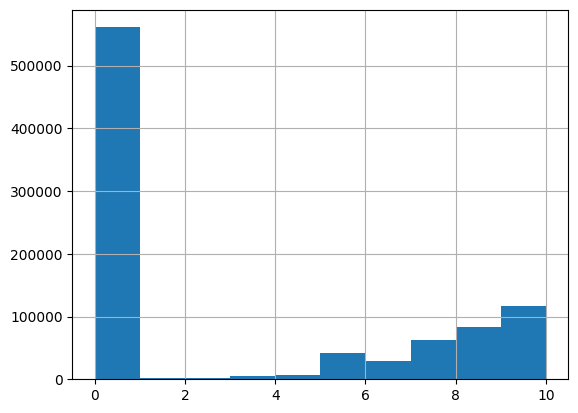

In [17]:
rating["Book-Rating"].hist(bins=10)

#Analysis:
##The top three publishers are:<br>
Harlequin<br>
pocket<br>
Ballantine Books.<br>

##Most rated books are<br>
0971880107	1312<br>
0316666343	668<br>
0385504209	471<br>

##Top authors by number of books<br>
Stephen King	193<br>
Agatha Christie	178<br>
Nora Roberts	123<br>

**Popularity Based Recommender System**

In [18]:
rating_with_name=rating.merge(books,on='ISBN')

In [19]:
rating_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276727,0446520802,0.0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
2,276744,038550120X,7.0,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
3,276746,0425115801,0.0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...
4,276746,0449006522,0.0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...
...,...,...,...,...,...,...,...,...,...,...
575191,221576,0425098729,9.0,Morgans Passing,Anne Tyler,1986,Berkley Publishing Group,http://images.amazon.com/images/P/0425098729.0...,http://images.amazon.com/images/P/0425098729.0...,http://images.amazon.com/images/P/0425098729.0...
575192,221591,0373218036,0.0,"Truly, Madly Manhattan",Nora Roberts,2003,Silhouette,http://images.amazon.com/images/P/0373218036.0...,http://images.amazon.com/images/P/0373218036.0...,http://images.amazon.com/images/P/0373218036.0...
575193,221591,038000917X,0.0,Rebecca,Daphne du Maurier,1982,Avon Books,http://images.amazon.com/images/P/038000917X.0...,http://images.amazon.com/images/P/038000917X.0...,http://images.amazon.com/images/P/038000917X.0...
575194,221591,0425180905,0.0,The Spirit Woman,Margaret Coel,2001,Berkley Publishing Group,http://images.amazon.com/images/P/0425180905.0...,http://images.amazon.com/images/P/0425180905.0...,http://images.amazon.com/images/P/0425180905.0...


In [20]:
num_rating_df = rating_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()

In [21]:
num_rating_df

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Beyond IBM: Leadership Marketing and Finance ...,1
2,Earth Prayers From around the World: 365 Pray...,8
3,Final Fantasy Anthology: Official Strategy Gu...,4
4,It Takes Two,2
...,...,...
76808,Ã?ngeles fugaces (Falling Angels),4
76809,Ã?Â?ber die Freiheit.,1
76810,Ã?Â?bermorgen.,1
76811,Ã?Â?rger mit Produkt X. Roman.,3


In [22]:
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Beyond IBM: Leadership Marketing and Finance ...,1
2,Earth Prayers From around the World: 365 Pray...,8
3,Final Fantasy Anthology: Official Strategy Gu...,4
4,It Takes Two,2
...,...,...
76808,Ã?ngeles fugaces (Falling Angels),4
76809,Ã?Â?ber die Freiheit.,1
76810,Ã?Â?bermorgen.,1
76811,Ã?Â?rger mit Produkt X. Roman.,3


In [23]:
rating_with_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575196 entries, 0 to 575195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              575196 non-null  int64  
 1   ISBN                 575196 non-null  object 
 2   Book-Rating          575196 non-null  float64
 3   Book-Title           575196 non-null  object 
 4   Book-Author          575196 non-null  object 
 5   Year-Of-Publication  575196 non-null  int64  
 6   Publisher            575196 non-null  object 
 7   Image-URL-S          575196 non-null  object 
 8   Image-URL-M          575196 non-null  object 
 9   Image-URL-L          575196 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 43.9+ MB


In [24]:
avg_rating_df=rating_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Beyond IBM: Leadership Marketing and Finance ...,0.000000
2,Earth Prayers From around the World: 365 Pray...,6.250000
3,Final Fantasy Anthology: Official Strategy Gu...,5.000000
4,It Takes Two,0.000000
...,...,...
76808,Ã?ngeles fugaces (Falling Angels),1.000000
76809,Ã?Â?ber die Freiheit.,7.000000
76810,Ã?Â?bermorgen.,0.000000
76811,Ã?Â?rger mit Produkt X. Roman.,4.666667


In [25]:
popular_df=num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
2,Earth Prayers From around the World: 365 Pray...,8,6.250000
3,Final Fantasy Anthology: Official Strategy Gu...,4,5.000000
4,It Takes Two,2,0.000000
...,...,...,...
76808,Ã?ngeles fugaces (Falling Angels),4,1.000000
76809,Ã?Â?ber die Freiheit.,1,7.000000
76810,Ã?Â?bermorgen.,1,0.000000
76811,Ã?Â?rger mit Produkt X. Roman.,3,4.666667


In [26]:
popular_df.sort_values('num_ratings',ascending=False)

,Book-Title,num_ratings,avg_rating
75014,Wild Animus,1967,1.013218
62627,The Lovely Bones: A Novel,1000,4.435000
58152,The Da Vinci Code,710,4.605634
63630,The Nanny Diaries: A Novel,667,3.455772
1772,A Painted House,662,3.268882
...,...,...,...
56665,The Boys of My Youth (Boys of My Youth),1,0.000000
56662,The Boys and Their Baby (Stonewall Inn Editions),1,7.000000
27753,Hungarian Cookery Book,1,7.000000
27755,Hungarian cuisine: A complete cookery book,1,7.000000


In [27]:
popular_df[popular_df['num_ratings']>250].shape

(105, 3)

we only keep those books as popular whose num rating is greater than 250

In [28]:
popular_df=popular_df[popular_df['num_ratings']>250].sort_values('avg_rating',ascending=False)

In [29]:
popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title').shape

(105, 10)

In [30]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [31]:
popular_df.head()

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,284,5.929577
2,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,327,5.837920
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,254,5.649606
7,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,437,5.256293
10,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,455,5.002198


#Collaborative Filtering Based Recommender System

In [32]:
rating_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276727,0446520802,0.0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
2,276744,038550120X,7.0,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
3,276746,0425115801,0.0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...
4,276746,0449006522,0.0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...
...,...,...,...,...,...,...,...,...,...,...
575191,221576,0425098729,9.0,Morgans Passing,Anne Tyler,1986,Berkley Publishing Group,http://images.amazon.com/images/P/0425098729.0...,http://images.amazon.com/images/P/0425098729.0...,http://images.amazon.com/images/P/0425098729.0...
575192,221591,0373218036,0.0,"Truly, Madly Manhattan",Nora Roberts,2003,Silhouette,http://images.amazon.com/images/P/0373218036.0...,http://images.amazon.com/images/P/0373218036.0...,http://images.amazon.com/images/P/0373218036.0...
575193,221591,038000917X,0.0,Rebecca,Daphne du Maurier,1982,Avon Books,http://images.amazon.com/images/P/038000917X.0...,http://images.amazon.com/images/P/038000917X.0...,http://images.amazon.com/images/P/038000917X.0...
575194,221591,0425180905,0.0,The Spirit Woman,Margaret Coel,2001,Berkley Publishing Group,http://images.amazon.com/images/P/0425180905.0...,http://images.amazon.com/images/P/0425180905.0...,http://images.amazon.com/images/P/0425180905.0...


In [33]:
rating_with_name.groupby('User-ID').count()['Book-Rating']

,Book-Rating
User-ID,
2,1
8,17
9,3
10,1
12,1
...,...
278846,1
278849,2
278851,11


In [34]:
x=rating_with_name.groupby('User-ID').count()['Book-Rating']>150
x[x]

,Book-Rating
User-ID,
254,True
1733,True
1903,True
2033,True
2110,True
...,...
219546,True
220278,True
221445,True


In [35]:
user_with_rating=x[x].index

In [36]:
user_with_rating

Index([   254,   1733,   1903,   2033,   2110,   2276,   2766,   2891,   2977,
         3363,
       ...
       217121, 217375, 217740, 218552, 218608, 219546, 220278, 221445, 277427,
       278418],
      dtype='int64', name='User-ID', length=617)

In [37]:
filtered_rating=rating_with_name[rating_with_name['User-ID'].isin(user_with_rating)]

In [38]:
filtered_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
754,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
755,277427,0026217457,0.0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...
756,277427,0030615321,0.0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...
757,277427,0060002050,0.0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...
758,277427,0060177721,0.0,Finding Moon,Tony Hillerman,1995,Harpercollins,http://images.amazon.com/images/P/0060177721.0...,http://images.amazon.com/images/P/0060177721.0...,http://images.amazon.com/images/P/0060177721.0...


In [39]:
y=filtered_rating.groupby('Book-Title').count()['Book-Rating']>=30
famous_books=y[y].index

In [40]:
filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
754,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
763,277427,0060930535,0.0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
765,277427,0060934417,0.0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
767,277427,0061009059,9.0,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
772,277427,006440188X,0.0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
575023,221445,1400034779,9.0,The No. 1 Ladies' Detective Agency (Today Show...,Alexander McCall Smith,2003,Anchor,http://images.amazon.com/images/P/1400034779.0...,http://images.amazon.com/images/P/1400034779.0...,http://images.amazon.com/images/P/1400034779.0...
575027,221445,1551668653,0.0,Getting Rid Of Bradley,Jennifer Crusie,2001,Mira,http://images.amazon.com/images/P/1551668653.0...,http://images.amazon.com/images/P/1551668653.0...,http://images.amazon.com/images/P/1551668653.0...
575029,221445,1558744150,0.0,Chicken Soup for the Woman's Soul (Chicken Sou...,Jack Canfield,1996,Health Communications,http://images.amazon.com/images/P/1558744150.0...,http://images.amazon.com/images/P/1558744150.0...,http://images.amazon.com/images/P/1558744150.0...
575033,221445,1565122968,0.0,Gap Creek: A Novel,Robert Morgan,2000,Algonquin Books of Chapel Hill,http://images.amazon.com/images/P/1565122968.0...,http://images.amazon.com/images/P/1565122968.0...,http://images.amazon.com/images/P/1565122968.0...


In [41]:
final_ratings=filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [42]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [43]:
pt

User-ID,254,1733,1903,2033,2110,2276,2766,2891,2977,3363,...,217121,217375,217740,218552,218608,219546,220278,221445,277427,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,0.0,0.0,NaN,0.0,NaN,NaN
2010: Odyssey Two,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204 Rosewood Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
pt.fillna(0,inplace=True)

In [45]:
pt

User-ID,254,1733,1903,2033,2110,2276,2766,2891,2977,3363,...,217121,217375,217740,218552,218608,219546,220278,221445,277427,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(pt)

array([[1.        , 0.13351677, 0.06182658, ..., 0.14902032, 0.08399251,
        0.05938348],
       [0.13351677, 1.        , 0.04073675, ..., 0.09129012, 0.19104491,
        0.16062334],
       [0.06182658, 0.04073675, 1.        , ..., 0.16345565, 0.        ,
        0.        ],
       ...,
       [0.14902032, 0.09129012, 0.16345565, ..., 1.        , 0.07626739,
        0.02541686],
       [0.08399251, 0.19104491, 0.        , ..., 0.07626739, 1.        ,
        0.12761737],
       [0.05938348, 0.16062334, 0.        , ..., 0.02541686, 0.12761737,
        1.        ]])

In [47]:
similarity_scores=cosine_similarity(pt)

In [48]:
similarity_scores.shape

(1098, 1098)

In [49]:
def recommend(bookname):
  index=np.where(pt.index==bookname)[0][0]
  similar_items=sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
  for i in similar_items:
    print(pt.index[i[0]])

In [53]:
recommend('1984')

The Tale of the Body Thief (Vampire Chronicles (Paperback))
Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death
Animal Farm
The Vampire Lestat (Vampire Chronicles, Book II)
Fahrenheit 451


In [54]:
import pickle

In [55]:
pickle.dump(popular_df,open('popular.pkl','wb'))

In [56]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

In [57]:
popular_df.shape

(105, 5)

In [58]:
popular_df.head()

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,284,5.929577
2,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,327,5.837920
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,254,5.649606
7,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,437,5.256293
10,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,455,5.002198


In [59]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
